## Titanic Survival Prediction

In [ ]:
!gdown 1OFgBOb4B1j32uK26vf5urkp8rqVmD_Wf

Downloading...
From: https://drive.google.com/uc?id=1OFgBOb4B1j32uK26vf5urkp8rqVmD_Wf
To: /content/titanic.zip
100% 7.00k/7.00k [00:00<00:00, 15.8MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace titanic_modified_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [ ]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [ ]:
X[:5]

array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ,  0.    ,
         0.    ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    ,
         1.    ],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,
         2.    ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ,
         1.    ],
       [ 3.    ,  0.    , 35.    ,  0.    ,  0.    ,  8.05  ,  0.    ,
         0.    ]])

In [ ]:
y[:5]

array([0., 1., 1., 1., 0.])

In [ ]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [ ]:
X_b[:5]

array([[ 1.    ,  3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ,
         0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833,
         1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ,
         0.    ,  2.    ],
       [ 1.    ,  1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ,
         0.    ,  1.    ],
       [ 1.    ,  3.    ,  0.    , 35.    ,  0.    ,  0.    ,  8.05  ,
         0.    ,  0.    ]])

In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size,random_state=random_state, shuffle=is_shuffle)

In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid(dot_product)
  return y_hat

def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
  return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def compute_gradient(X, y, y_hat):
  return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
  return theta - lr * gradient

def compute_accuracy(X, y, theta):
  y_hat = predict (X, theta).round()
  acc = (y_hat == y).mean()
  return acc

In [ ]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range (epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)

    gradient = compute_gradient(X_i, y_i, y_hat)
    theta = update_theta(theta, gradient, lr)

    train_batch_losses.append(train_loss)
    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)

    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)
    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.703	Validation loss: 0.599

EPOCH 2:	Training loss: 0.670	Validation loss: 0.582

EPOCH 3:	Training loss: 0.640	Validation loss: 0.567

EPOCH 4:	Training loss: 0.614	Validation loss: 0.555

EPOCH 5:	Training loss: 0.592	Validation loss: 0.544

EPOCH 6:	Training loss: 0.572	Validation loss: 0.535

EPOCH 7:	Training loss: 0.554	Validation loss: 0.528

EPOCH 8:	Training loss: 0.539	Validation loss: 0.522

EPOCH 9:	Training loss: 0.526	Validation loss: 0.517

EPOCH 10:	Training loss: 0.514	Validation loss: 0.513

EPOCH 11:	Training loss: 0.504	Validation loss: 0.509

EPOCH 12:	Training loss: 0.495	Validation loss: 0.507

EPOCH 13:	Training loss: 0.487	Validation loss: 0.505

EPOCH 14:	Training loss: 0.480	Validation loss: 0.503

EPOCH 15:	Training loss: 0.474	Validation loss: 0.502

EPOCH 16:	Training loss: 0.468	Validation loss: 0.501

EPOCH 17:	Training loss: 0.463	Validation loss: 0.500

EPOCH 18:	Training loss: 0.459	Validation loss: 0.500

EPOCH 19:	Training

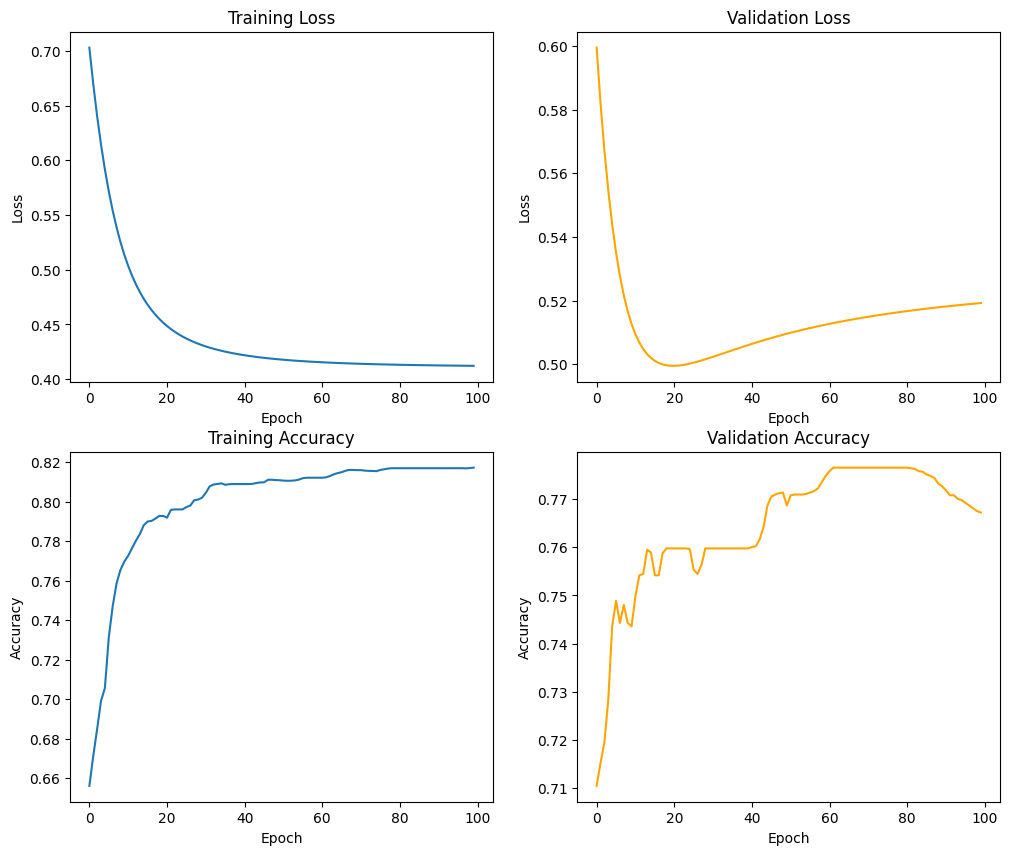

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax [0, 0].plot(train_losses)
ax [0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')
ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')
ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')
plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f' Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.770949720670391
 Accuracy: 0.7752808988764045


## Twitter Sentiment Analysis

In [ ]:
!gdown 1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j

Downloading...
From: https://drive.google.com/uc?id=1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j
To: /content/twitter_sentiment_analysis_2cls_dataset.zip
100% 471k/471k [00:00<00:00, 70.0MB/s]


In [ ]:
!unzip /content/twitter_sentiment_analysis_2cls_dataset.zip

Archive:  /content/twitter_sentiment_analysis_2cls_dataset.zip
replace sentiment_analysis.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [ ]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col='id')

df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


In [ ]:
def text_normalize (text):
  # Retweet old acronym "RT" removal
  text = re.sub(r'^RT[\s]+', '', text)
  # Hyperlinks removal
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  # Hashtags removal
  text = re.sub(r'#', '', text)
  # Punctuation removal
  text = re.sub(r'[^\w\s]', '', text)
  # Tokenization
  tokenizer = TweetTokenizer (preserve_case=False, strip_handles=True, reduce_len=True)
  text_tokens = tokenizer.tokenize (text)

  return text_tokens

In [ ]:
def get_freqs(df):
  freqs = defaultdict(lambda: 0)

  for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    tokens = text_normalize(tweet)

    for token in tokens:
      pair = (token, label)
      freqs[pair] += 1

  return freqs

In [ ]:
def get_feature(text, fregs):
  tokens = text_normalize(text)

  X = np.zeros(3)
  X[0] = 1

  for token in tokens:
    X[1] += fregs[(token, 0)]
    X[2] += fregs[(token, 1)]

  return X


In [ ]:
X = []
y = []
freqs = get_freqs(df)

for idx, row in df.iterrows():
  tweet = row['tweet']
  label = row['label']
  X_i = get_feature (tweet, freqs)
  X.append(X_i)
  y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2

is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=test_size, random_state=random_state, shuffle=is_shuffle)

In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
  return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid (dot_product)
  return y_hat

def compute_gradient(X, y, y_hat):
  return np.dot(X.T, (y_hat - y)) / y.size

def update_theta (theta, gradient, ir):
  return theta - lr * gradient

def compute_accuracy(X, y, theta):
  y_hat = predict (X, theta).round()
  acc = (y_hat == y).mean()
  return acc

In [ ]:
lr = 0.01
epochs = 200
batch_size = 128
np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range (epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)

    gradient = compute_gradient(X_i, y_i, y_hat)
    theta = update_theta(theta, gradient, lr)

    train_batch_losses.append(train_loss)
    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)

    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)
    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')


EPOCH 1:	Training loss: 0.707	Validation loss: 0.704

EPOCH 2:	Training loss: 0.661	Validation loss: 0.659

EPOCH 3:	Training loss: 0.624	Validation loss: 0.622

EPOCH 4:	Training loss: 0.594	Validation loss: 0.591

EPOCH 5:	Training loss: 0.569	Validation loss: 0.566

EPOCH 6:	Training loss: 0.548	Validation loss: 0.546

EPOCH 7:	Training loss: 0.531	Validation loss: 0.528

EPOCH 8:	Training loss: 0.516	Validation loss: 0.514

EPOCH 9:	Training loss: 0.504	Validation loss: 0.502

EPOCH 10:	Training loss: 0.494	Validation loss: 0.491

EPOCH 11:	Training loss: 0.485	Validation loss: 0.483

EPOCH 12:	Training loss: 0.477	Validation loss: 0.475

EPOCH 13:	Training loss: 0.471	Validation loss: 0.468

EPOCH 14:	Training loss: 0.465	Validation loss: 0.463

EPOCH 15:	Training loss: 0.460	Validation loss: 0.457

EPOCH 16:	Training loss: 0.456	Validation loss: 0.453

EPOCH 17:	Training loss: 0.452	Validation loss: 0.449

EPOCH 18:	Training loss: 0.448	Validation loss: 0.445

EPOCH 19:	Training

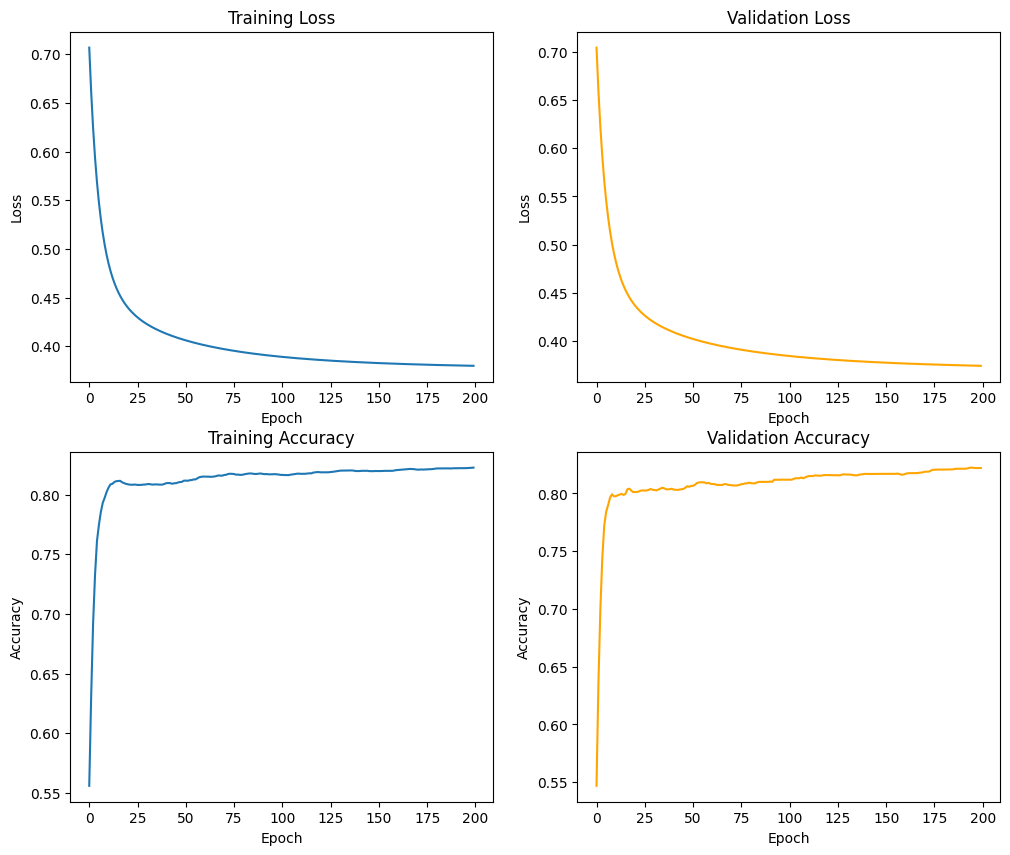

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax [0, 0].plot(train_losses)
ax [0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')
ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')
ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')
ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')
plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.821969696969697
Accuracy: 0.8434343434343434


## Multiple choice

### 13.
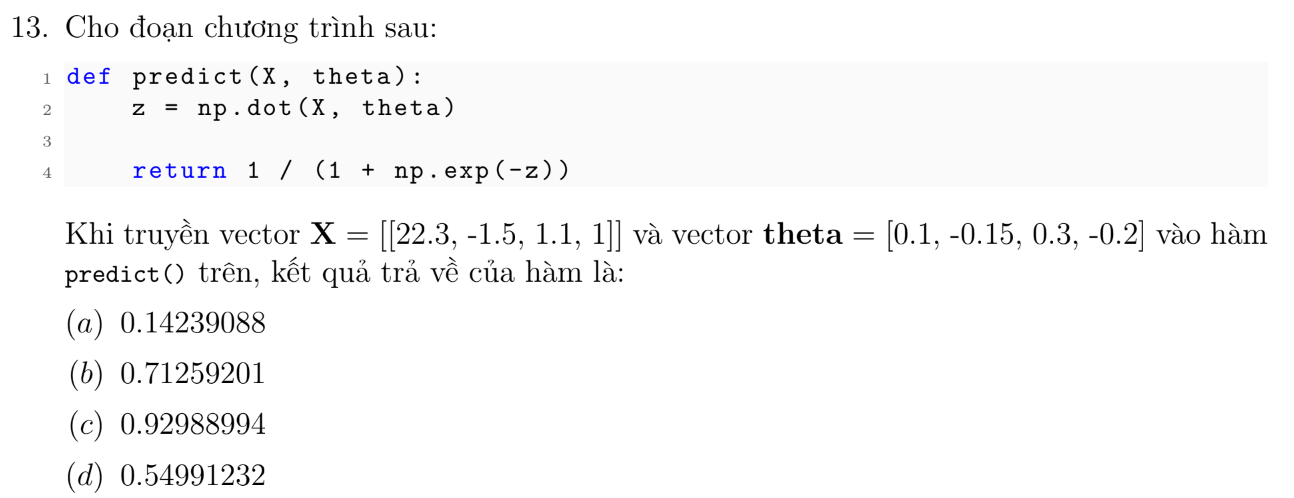

In [ ]:
def predict(X, theta):
  z = np.dot(X, theta)
  return 1 / (1 + np.exp(-z))

In [ ]:
X = [[22.3, -1.5, 1.1, 1]]
theta = [0.1, -0.15, 0.3, -0.2]

X = np.array(X)
theta = np.array(theta)

predict(X, theta)

array([0.92988994])

### 14.
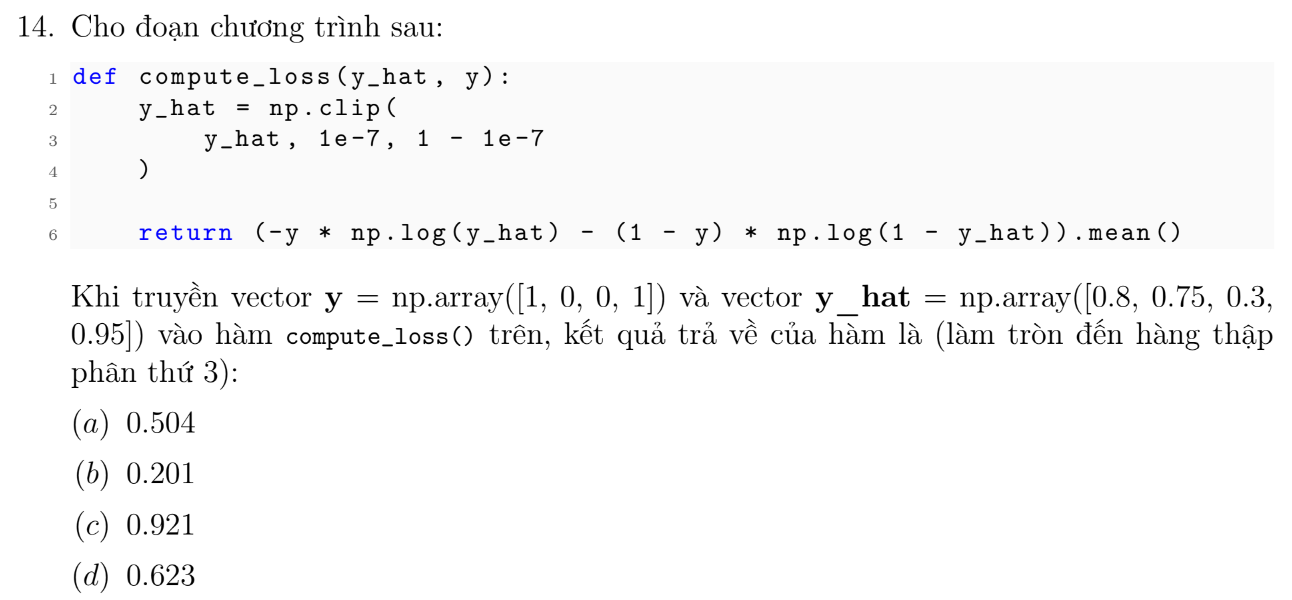

In [ ]:
def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
  return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

In [ ]:
y = np.array([1, 0, 0, 1])
y_hat = np.array([0.8, 0.75, 0.3, 0.95])

compute_loss(y_hat, y)

0.5043515376900958

### 16.
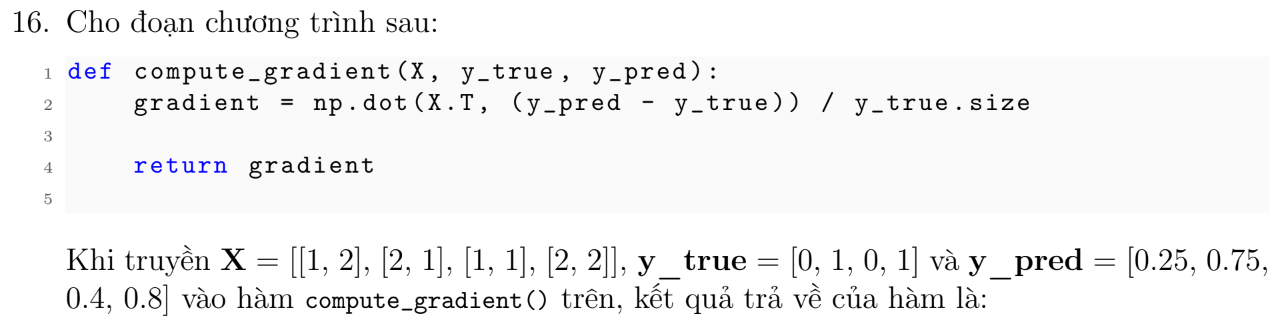

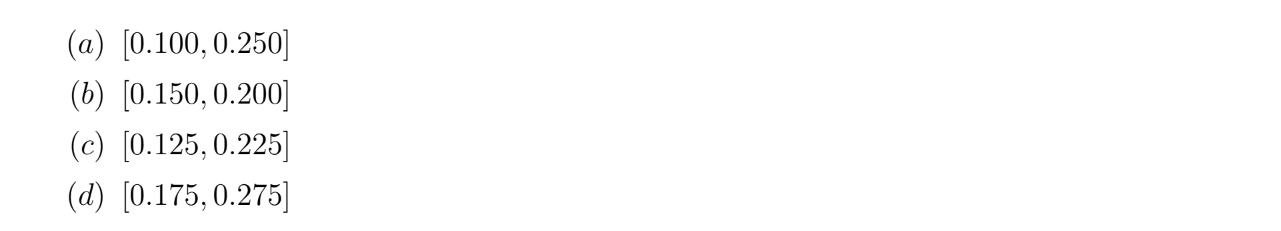

In [ ]:
def compute_gradient(X, y_true, y_pred):
  gradient = np.dot(X.T, (y_pred - y_true)) / y_true.size
  return gradient

In [ ]:
X = [[1, 2], [2, 1], [1, 1], [2, 2]]
y_true = [0, 1, 0, 1]
y_pred = [0.25, 0.75, 0.4, 0.8]
X = np.array(X)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

compute_gradient(X, y_true, y_pred)

array([-0.0625,  0.0625])

### 17.
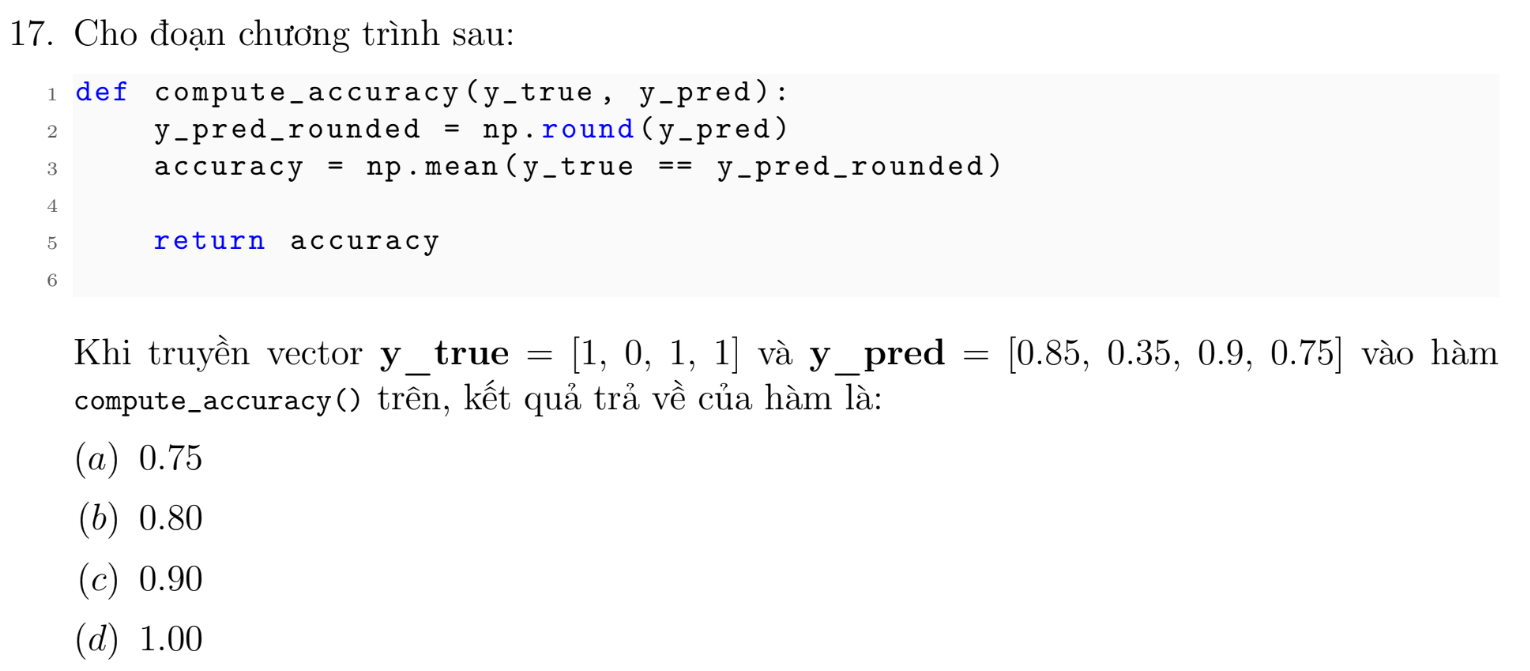

In [ ]:
def compute_accuracy(y_true, y_pred):
  y_pred_rounded = np.round(y_pred)
  accuracy = np.mean(y_true == y_pred_rounded)
  return accuracy

In [ ]:
y_true = [1, 0, 1, 1]
y_pred = [0.85, 0.35, 0.9, 0.75]

compute_accuracy(y_true, y_pred)

1.0

### 18.
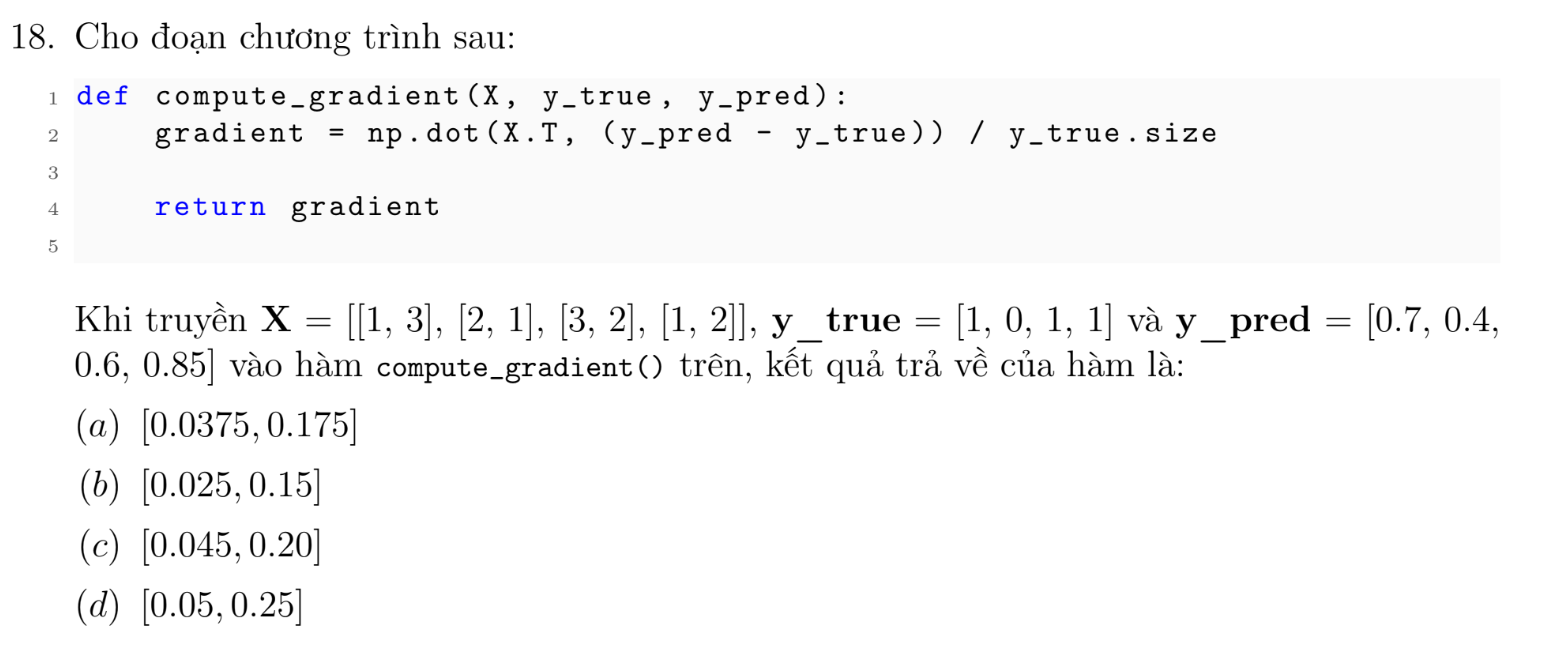

In [ ]:
def compute_gradient(X, y_true, y_pred):
  gradient = np.dot(X.T, (y_pred - y_true)) / y_true.size
  return gradient

In [ ]:
X = [[1, 3], [2, 1], [3, 2], [1, 2]]
y_true = [1, 0, 1, 1]
y_pred = [0.7, 0.4, 0.6, 0.85]

X = np.array(X)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

compute_gradient(X, y_true, y_pred)

array([-0.2125, -0.4   ])